In [2]:
import numpy as np
import pandas as pd

In [3]:
url="https://github.com/vaasew/smartphones_eda/raw/main/data/smartphone_cleaned%20(2).csv"
df = pd.read_csv(url)

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [7]:
num_columns = df.select_dtypes(include=['float64','int64']).iloc[:,[0,1,3,4,6,9,13,14,16]].columns
num_columns

Index(['price', 'rating', 'processor_speed', 'battery_capacity',
       'fast_charging', 'screen_size', 'primary_camera_rear',
       'primary_camera_front', 'extended_upto'],
      dtype='object')

In [8]:
all_col=df.columns
cat_columns=[x for x in all_col if x not in num_columns]
cat_columns

['brand_name',
 'model',
 'has_5g',
 'has_nfc',
 'has_ir_blaster',
 'processor_brand',
 'num_cores',
 'fast_charging_available',
 'ram_capacity',
 'internal_memory',
 'refresh_rate',
 'resolution',
 'num_rear_cameras',
 'num_front_cameras',
 'os',
 'extended_memory_available']

1. Categorical features - ['brand_name',
 'model',
 'has_5g',
 'has_nfc',
 'has_ir_blaster',
 'processor_brand',
 'num_cores',
 'fast_charging_available',
 'ram_capacity',
 'internal_memory',
 'refresh_rate',
 'resolution',
 'num_rear_cameras',
 'num_front_cameras',
 'os',
 'extended_memory_available']
2. Numerical features - ['price', 'rating', 'processor_speed', 'battery_capacity','fast_charging', 'screen_size', 'primary_camera_rear',
'primary_camera_front', 'extended_upto']

In [9]:
df.info()
# model column kept like a helper column to understand outliers better. it doesnt contribute to the model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [10]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

#**Univariate Analysis of numerical features**

1. Price Column

In [11]:
# price
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

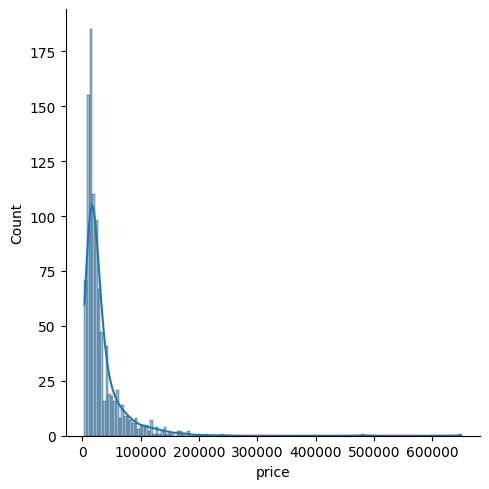

In [12]:
sns.displot(kind='hist',data=df,x='price',kde=True)

In [13]:
df['price'].skew()
# highly right skewed

6.591790999665567

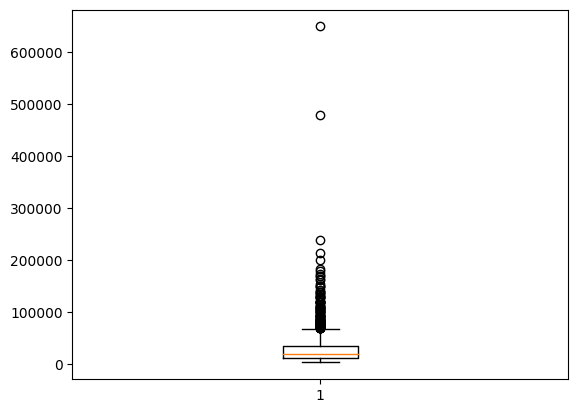

In [14]:
bp=plt.boxplot(df['price'])

In [15]:
[item.get_ydata()[1] for item in bp['whiskers']]

[3499.0, 67999.0]

In [16]:
# checking the outliers in price values
df[df['price']>67999]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
14,samsung,Samsung Galaxy S23 Ultra 5G,114990,NaN,True,True,False,snapdragon,8.0,3.20,5000.0,1,45.0,8.0,256.0,6.80,120,1440 x 3088,4,1.0,android,200.0,12.0,0,NaN
27,apple,Apple iPhone 14 Pro Max,129990,76.0,True,True,False,bionic,6.0,NaN,4323.0,1,NaN,6.0,128.0,6.70,120,1290 x 2796,3,1.0,ios,48.0,12.0,0,NaN
29,oneplus,OnePlus 11 Pro,69999,NaN,True,True,False,snapdragon,8.0,3.20,4500.0,1,100.0,8.0,128.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
37,samsung,Samsung Galaxy S22 Ultra 5G,91999,NaN,True,True,False,snapdragon,8.0,3.00,5000.0,1,45.0,12.0,256.0,6.80,120,1440 x 3080,4,1.0,android,108.0,40.0,0,NaN
56,apple,Apple iPhone 14 Plus,74999,82.0,True,True,False,bionic,6.0,3.22,4325.0,1,NaN,6.0,128.0,6.70,60,1284 x 2778,2,1.0,ios,12.0,12.0,0,NaN
58,samsung,Samsung Galaxy S23 Plus,84990,89.0,True,True,False,snapdragon,8.0,3.20,4700.0,1,45.0,8.0,256.0,6.60,120,1080 x 2340,3,1.0,android,50.0,12.0,0,NaN
69,oppo,Oppo Find N Fold,99990,NaN,True,True,False,snapdragon,8.0,3.20,5000.0,1,67.0,8.0,256.0,7.10,120,1792 x 1920,2,NaN,other,50.0,NaN,0,NaN
76,apple,Apple iPhone 13 Pro,119900,83.0,True,True,False,bionic,6.0,3.22,3095.0,1,NaN,6.0,128.0,6.10,120,1170 x 2532,3,1.0,ios,12.0,12.0,0,NaN
93,vivo,Vivo X90 Pro Plus 5G,73999,NaN,True,True,True,snapdragon,8.0,3.20,4700.0,1,80.0,12.0,256.0,6.78,120,1440 x 3200,4,1.0,android,50.3,32.0,0,NaN
98,vivo,Vivo X Fold 5G,106990,NaN,True,True,False,snapdragon,8.0,3.00,4600.0,1,66.0,12.0,256.0,8.03,120,1916 x 2160,4,1.0,android,50.0,16.0,0,NaN


In [17]:
df[df['price']>200000]
# checking extreme outliers

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.50,2275.0,0,NaN,2.0,64.0,4.70,60,1080 x 1920,1,1.0,android,13.0,2.1,0,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,8.0,3.20,4700.0,1,66.0,12.0,512.0,6.74,120,1212 x 2616,3,1.0,other,50.0,13.0,1,256.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.80,4000.0,1,27.0,8.0,256.0,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,0,NaN
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,kirin,8.0,2.86,4500.0,1,NaN,12.0,512.0,6.53,60,1176 x 2400,4,2.0,android,40.0,32.0,1,256.0


Most of the highly priced phones are high featured ones but some extreme outliers are luxury phones having qualities like being gold plated. The luxury phones must be removed as being gold plated is ideally not a relevant feature we are planning to include and do not contribute to the model.

2. Rating

In [18]:
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

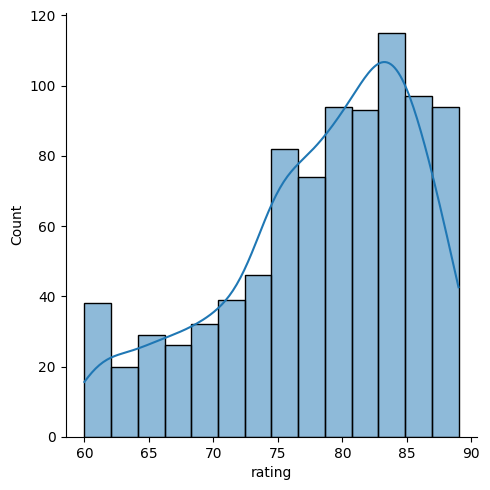

In [19]:
sns.displot(kind='hist',data=df,x='rating',kde=True)


In [20]:
df['rating'].skew()
# slightly left skewed, almost normal with many missing values

-0.6989993034105535

<Axes: >

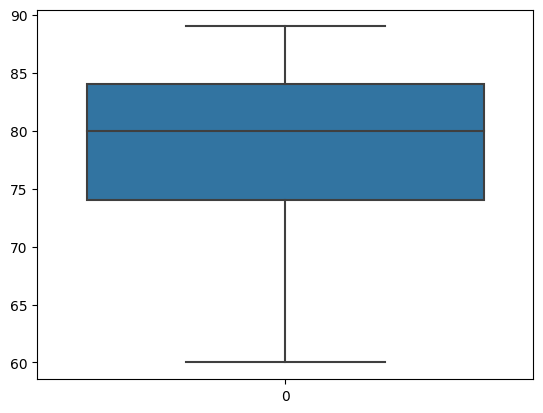

In [21]:
sns.boxplot(df['rating'])


In [22]:
# functions for kde plots and skew checking
def plot_graphs(column_name):

  sns.displot(kind='hist',kde=True,data=df,x=column_name,label=column_name)
  sns.catplot(kind='box',data=df,x=column_name)

def skew_check(column_name):
  print(column_name,df[column_name].skew())

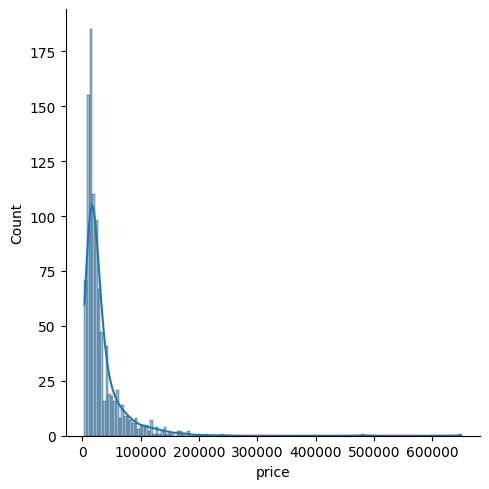

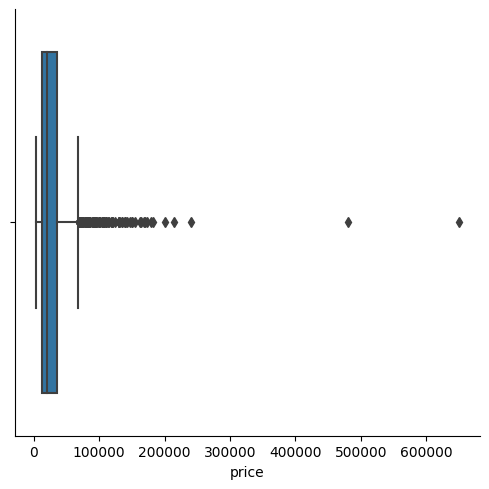

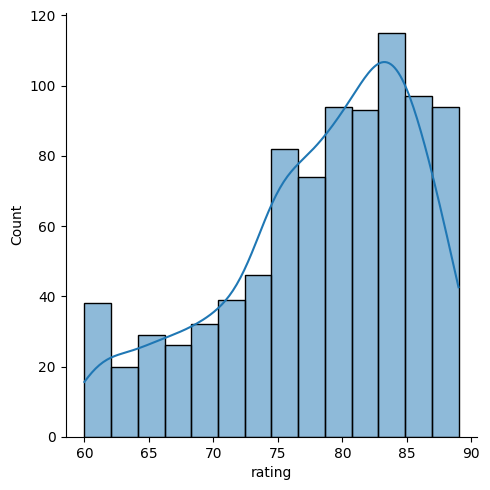

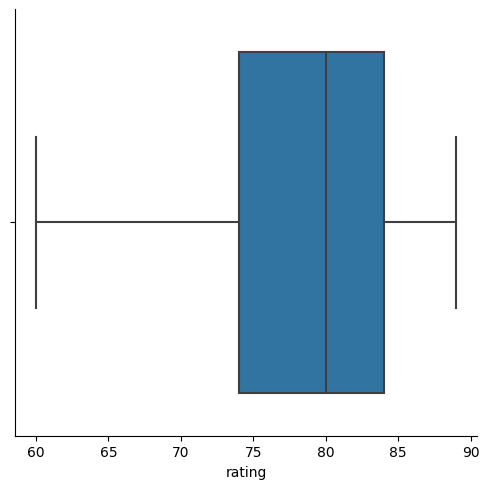

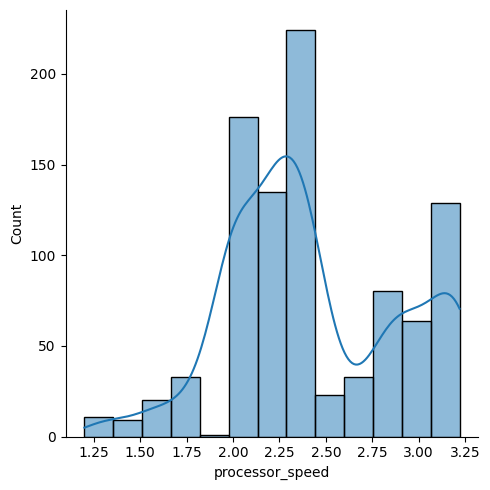

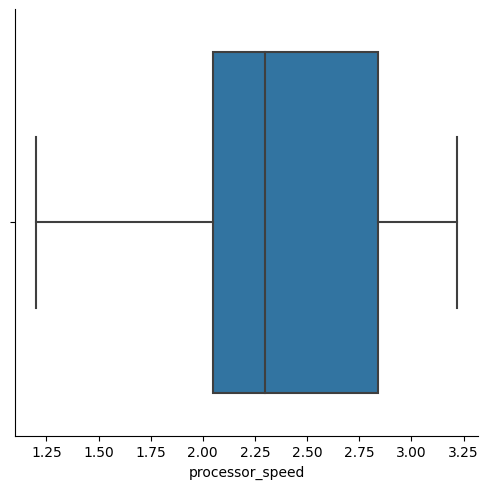

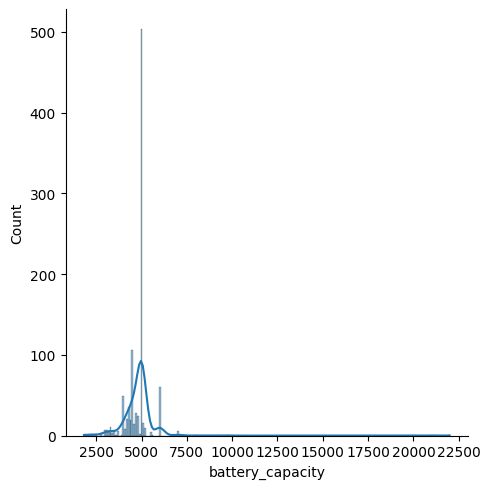

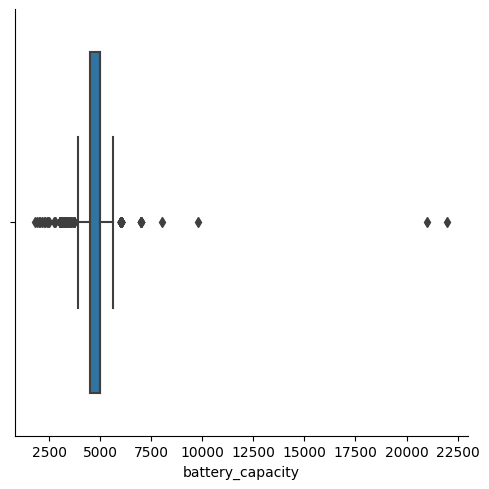

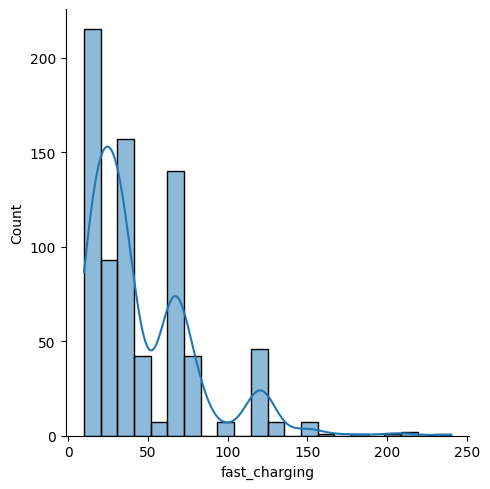

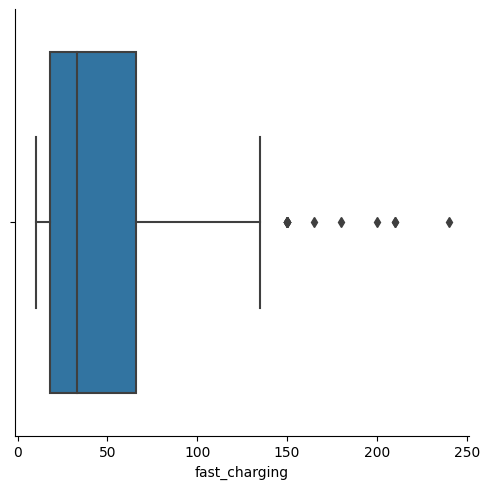

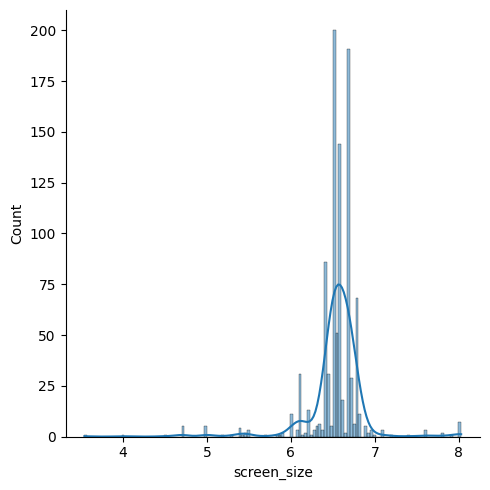

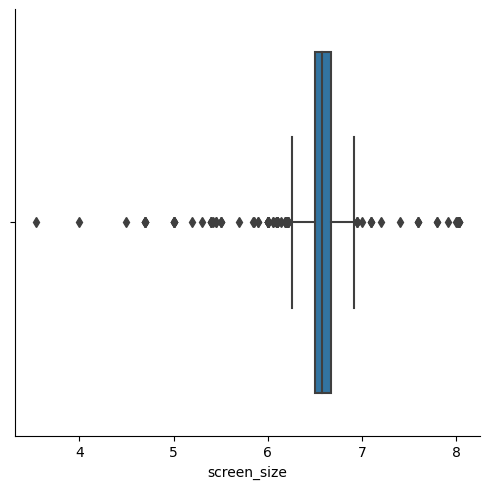

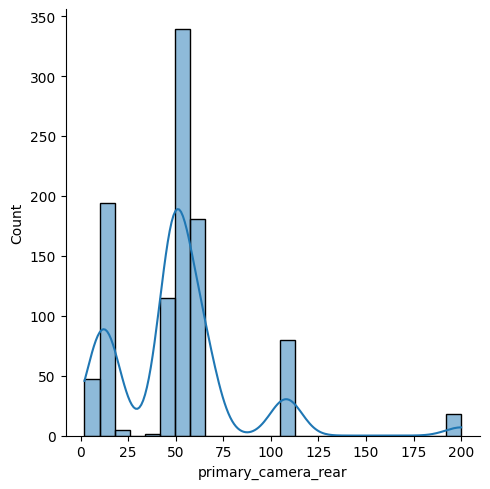

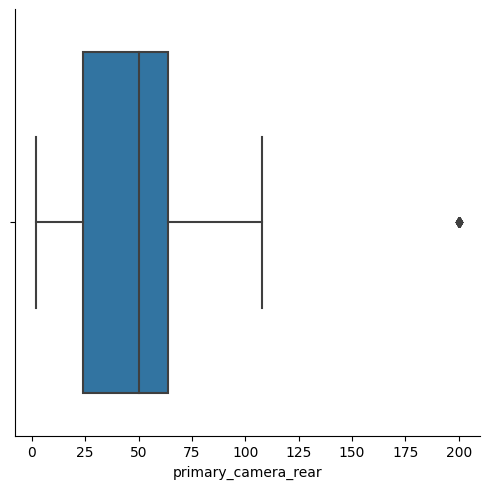

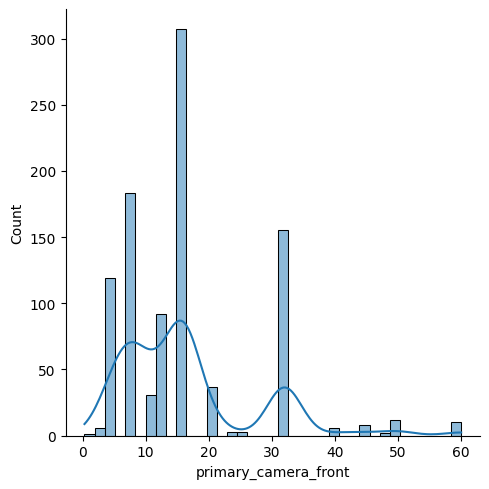

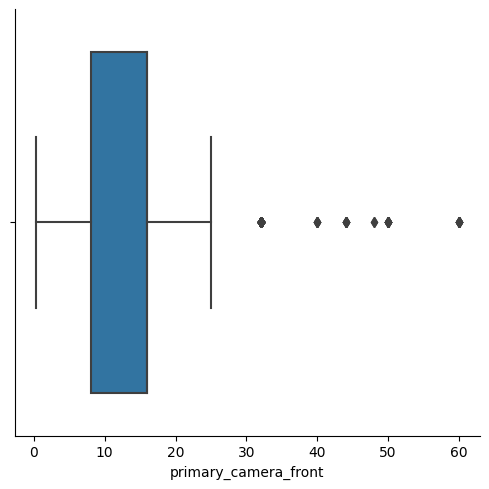

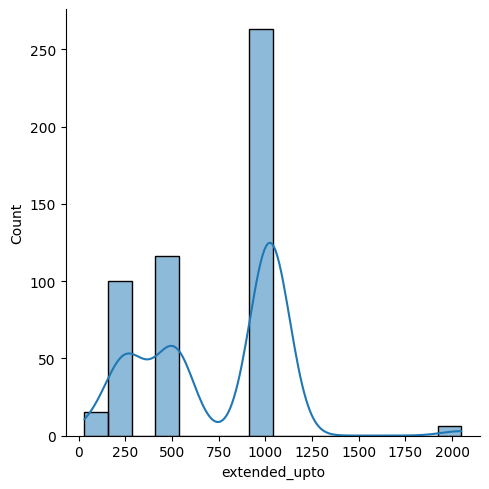

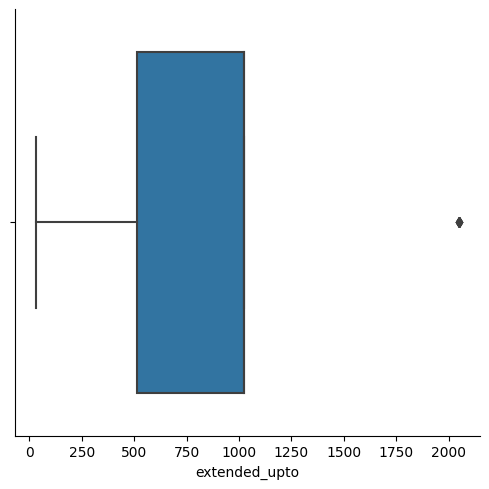

In [23]:
for col in num_columns:
  plot_graphs(col)


In [24]:
num_columns=num_columns[2:]
num_columns

Index(['processor_speed', 'battery_capacity', 'fast_charging', 'screen_size',
       'primary_camera_rear', 'primary_camera_front', 'extended_upto'],
      dtype='object')

In [25]:
for col in num_columns:
  skew_check(col)

processor_speed 0.18833557463624606
battery_capacity 9.260986328291182
fast_charging 1.6455706001461585
screen_size -2.11619902968816
primary_camera_rear 1.7705785615913048
primary_camera_front 1.439706620640227
extended_upto 0.14165610336592152


1. processor_speed - bi-modal graph with no outliers
2. battery_capacity - heavily right skewed almost normal/bi - modal with many outlier values especially on the lower end
3. fast_charging - right skewed multi - modal plot with a few outliers on the higher end
4. screen_size - left skewed almost normal plot with many outliers on either sides. It can be seen that phones with very small screens are present hence they are probably feature phones that are not relevant to our analysis and model building and must be removed.
5. primary_camera_rear - right skewed ,multimodal plot with one extreme outlier
6. primary_camera_front - right skewed and multimodal with high end outliers
7. extended_upto - multi-modal with one extreme high outlier


# **Univariate Analysis of Categorical Features**

# Top 10 phone brands in terms of volume of models

<Axes: >

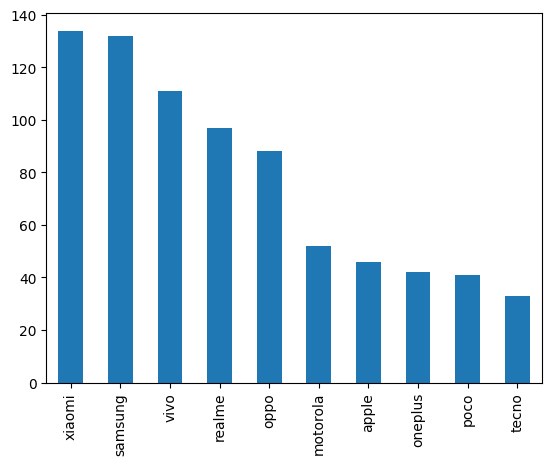

In [26]:
df['brand_name'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='has_5g'>

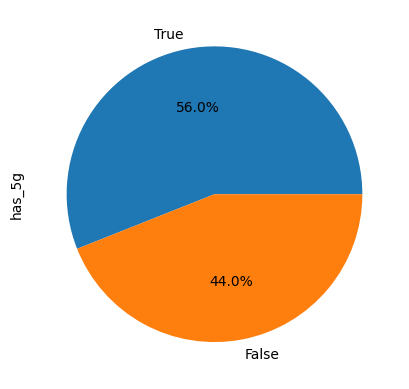

In [27]:
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='has_nfc'>

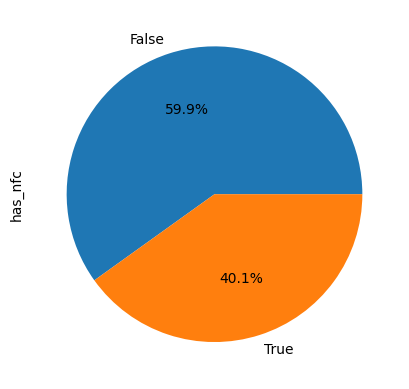

In [28]:
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='has_ir_blaster'>

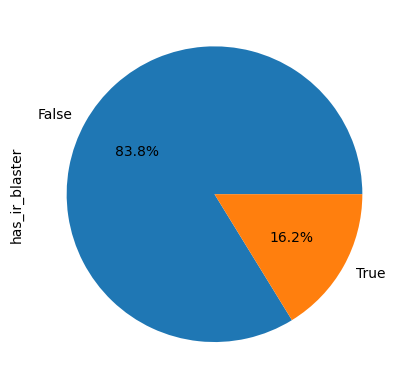

In [29]:
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [30]:
df[df['has_ir_blaster'] == True]['brand_name'].value_counts()

xiaomi     109
poco        30
iqoo         6
huawei       6
vivo         4
redmi        2
honor        1
samsung      1
Name: brand_name, dtype: int64

 It is notable that most phones with IR Blaster are of chinese brands

<Axes: >

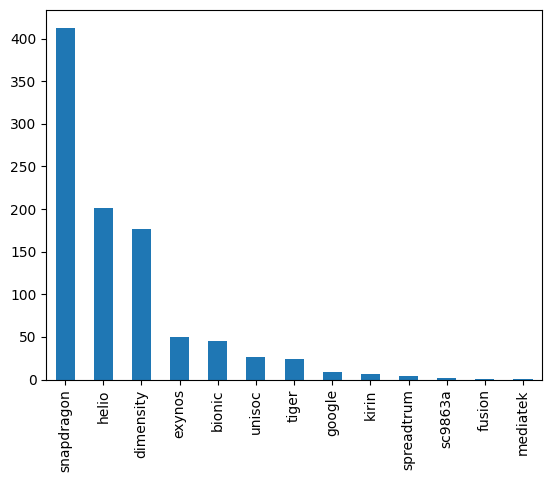

In [31]:
df['processor_brand'].value_counts().plot(kind='bar')


Snapdragon is the most popular os owing to its wide usage in android phones

<Axes: ylabel='num_cores'>

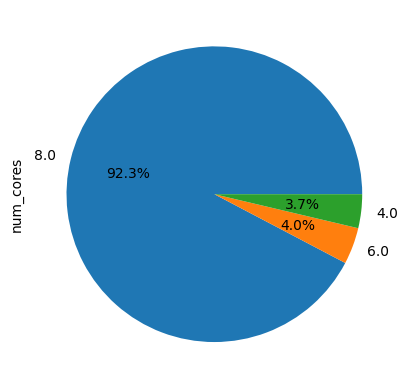

In [32]:
df['num_cores'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='fast_charging_available'>

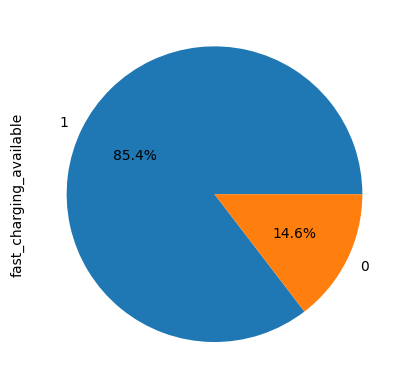

In [33]:
df['fast_charging_available'].value_counts().plot(kind='pie',autopct="%0.1f%%")


<Axes: ylabel='ram_capacity'>

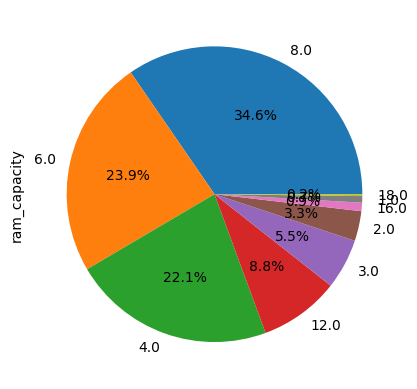

In [34]:
df['ram_capacity'].value_counts().plot(kind='pie',autopct="%0.1f%%")


<Axes: ylabel='internal_memory'>

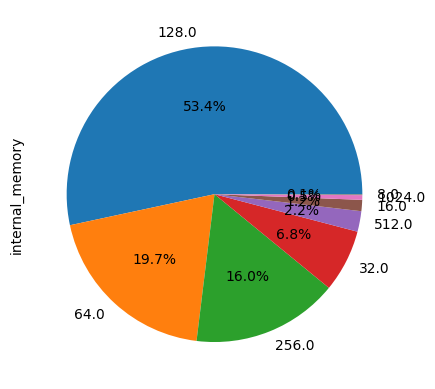

In [35]:
df['internal_memory'].value_counts().plot(kind='pie',autopct="%0.1f%%")


<Axes: ylabel='refresh_rate'>

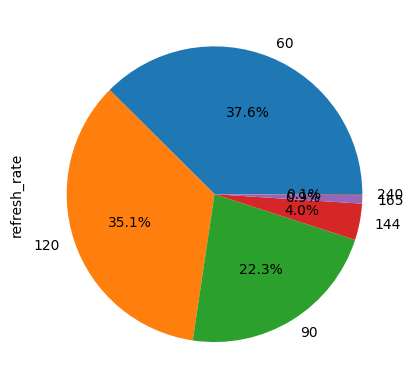

In [36]:
df['refresh_rate'].value_counts().plot(kind='pie',autopct="%0.1f%%")


In [37]:
df['refresh_rate'].value_counts()


60     368
120    344
90     219
144     39
165      9
240      1
Name: refresh_rate, dtype: int64

<Axes: >

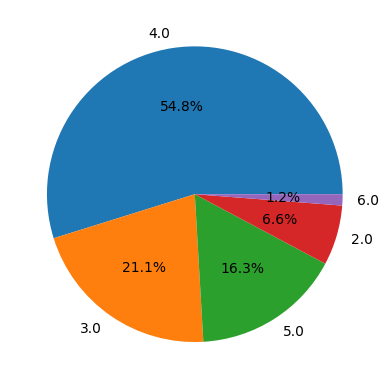

In [38]:
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind='pie',autopct="%0.1f%%")
# total number of cameras

<Axes: ylabel='os'>

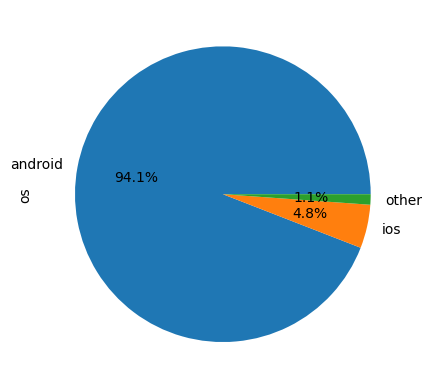

In [39]:
df['os'].value_counts().plot(kind='pie',autopct='%0.1f%%')


<Axes: ylabel='extended_memory_available'>

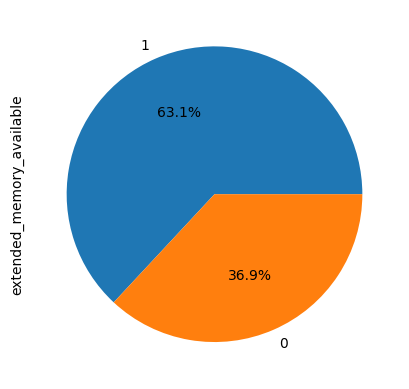

In [40]:
df['extended_memory_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')


<Axes: ylabel='extended_upto'>

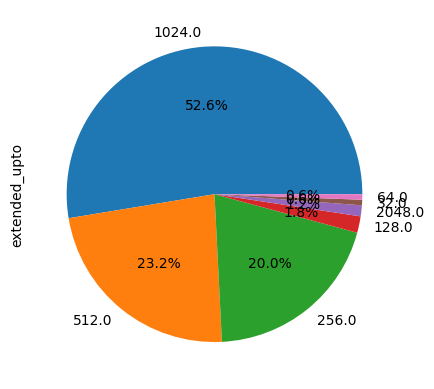

In [41]:
df['extended_upto'].value_counts().plot(kind='pie',autopct='%0.1f%%')


# **Bi-variate Analysis**

In [42]:
# getting only brands with more than 10 phones
x = df.groupby('brand_name').count()['model'].sort_values()
temp_df = df[df['brand_name'].isin(x[x > 10].index)]

In [43]:
# looking into linear correlation with price
temp_df.corr()['price']

<ipython-input-43-b34af1bc7ede>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp_df.corr()['price']


price                        1.000000
rating                       0.361212
has_5g                       0.344280
has_nfc                      0.517740
has_ir_blaster              -0.006102
num_cores                   -0.185675
processor_speed              0.589484
battery_capacity            -0.306569
fast_charging_available      0.154073
fast_charging                0.271186
ram_capacity                 0.445117
internal_memory              0.651042
screen_size                  0.216659
refresh_rate                 0.266264
num_rear_cameras             0.162675
num_front_cameras            0.145351
primary_camera_rear          0.111143
primary_camera_front         0.202837
extended_memory_available   -0.508532
extended_upto                0.027895
Name: price, dtype: float64

<ipython-input-44-245f74168aab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp_df.corr())


<Axes: >

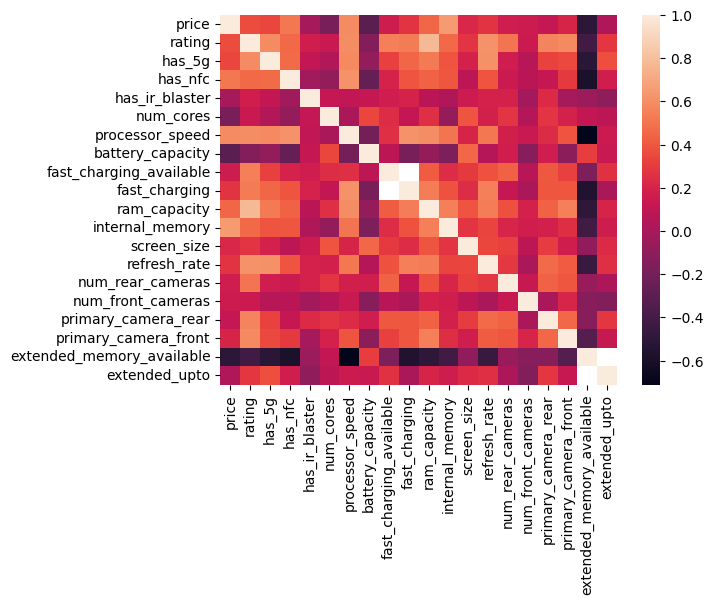

In [44]:
sns.heatmap(temp_df.corr())

1. Rating V/S Price

<Axes: xlabel='rating', ylabel='price'>

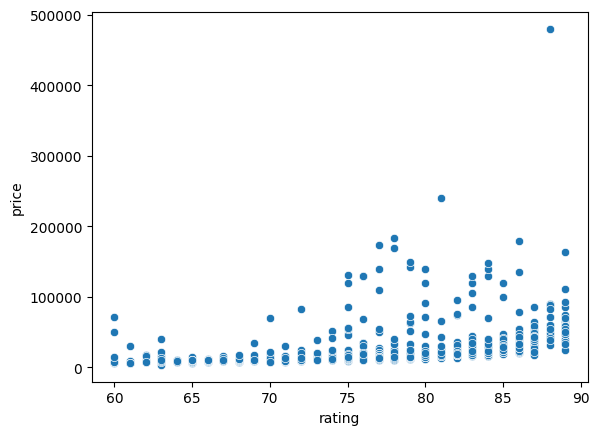

In [45]:
sns.scatterplot(data=temp_df,x='rating',y='price')

There is a small correlation between price and rating but a very high price does not guarantee a good rating.

<Axes: xlabel='rating', ylabel='price'>

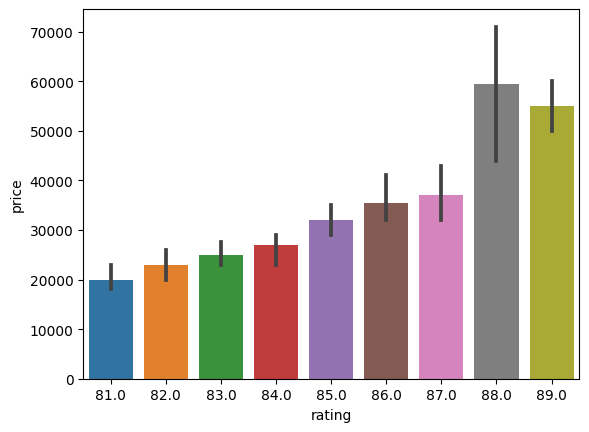

In [46]:
sns.barplot(data=temp_df[temp_df['rating']>80],x='rating',y='price',estimator=np.median)

You can notice that average price does go up with a higher rating

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '60.0'),
  Text(1, 0, '61.0'),
  Text(2, 0, '62.0'),
  Text(3, 0, '63.0'),
  Text(4, 0, '64.0'),
  Text(5, 0, '65.0'),
  Text(6, 0, '66.0'),
  Text(7, 0, '67.0'),
  Text(8, 0, '68.0'),
  Text(9, 0, '69.0'),
  Text(10, 0, '70.0'),
  Text(11, 0, '71.0'),
  Text(12, 0, '72.0'),
  Text(13, 0, '73.0'),
  Text(14, 0, '74.0'),
  Text(15, 0, '75.0'),
  Text(16, 0, '76.0'),
  Text(17, 0, '77.0'),
  Text(18, 0, '78.0'),
  Text(19, 0, '79.0'),
  Text(20, 0, '80.0'),
  Text(21, 0, '81.0'),
  Text(22, 0, '82.0'),
  Text(23, 0, '83.0'),
  Text(24, 0, '84.0'),
  Text(25, 0, '85.0'),
  Text(26, 0, '86.0'),
  Text(27, 0, '87.0'),
  Text(28, 0, '88.0'),
  Text(29, 0, '89.0')])

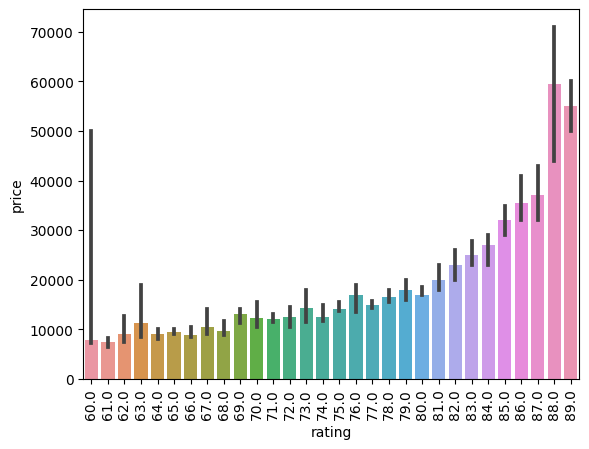

In [47]:
sns.barplot(data=temp_df,x='rating',y='price',estimator=np.median)
plt.xticks(rotation='vertical')


2. Has_5g v/s Price

<Axes: xlabel='has_5g', ylabel='price'>

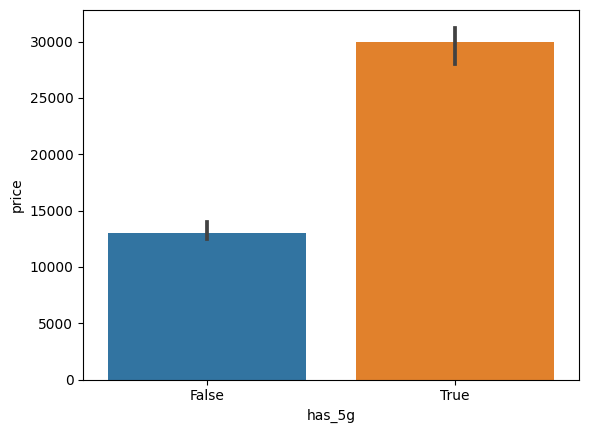

In [48]:
sns.barplot(data=temp_df,x='has_5g',y='price',estimator=np.median)

3. Has_nfc v/s Price

<Axes: xlabel='has_nfc', ylabel='price'>

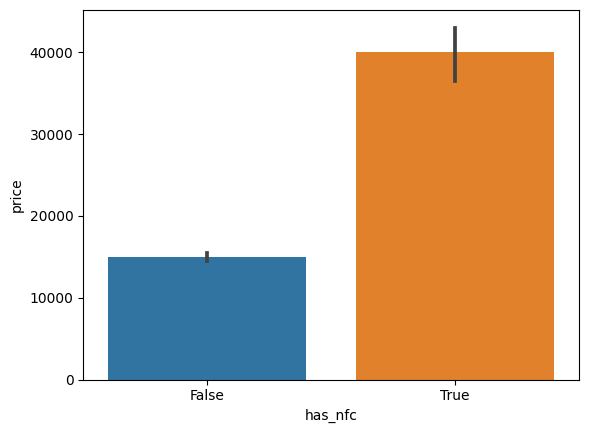

In [49]:
sns.barplot(data=temp_df,x='has_nfc',y='price',estimator=np.median)


4. Has_ir_blaster v/s Price

<Axes: xlabel='has_ir_blaster', ylabel='price'>

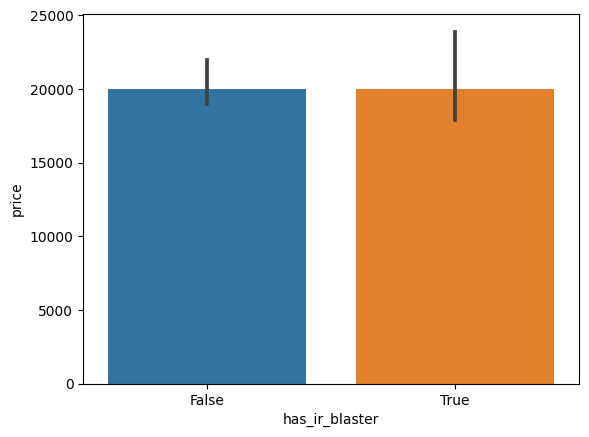

In [50]:
sns.barplot(data=temp_df,x='has_ir_blaster',y='price',estimator=np.median)


5. Number of cores v/s Price

(array([0, 1, 2]), [Text(0, 0, '4.0'), Text(1, 0, '6.0'), Text(2, 0, '8.0')])

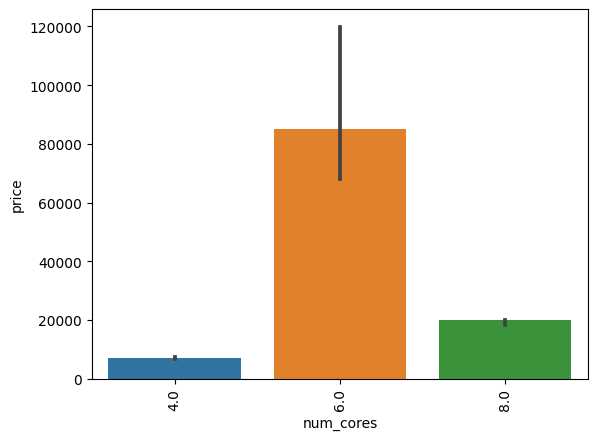

In [51]:
sns.barplot(data=temp_df,x='num_cores',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

Counter intuitive observation that phones with 6 cores are priced more than phones with 8 cores

In [52]:
pd.crosstab(temp_df['num_cores'],df['os'])

os,android,ios,other
num_cores,,,
4.0,15,1,0
6.0,0,39,0
8.0,814,1,10


Looking more into the data we understand that the reason for the above observation is that Iphones have 6 cores.

6. Processor speed v/s Price

<Axes: xlabel='processor_speed', ylabel='price'>

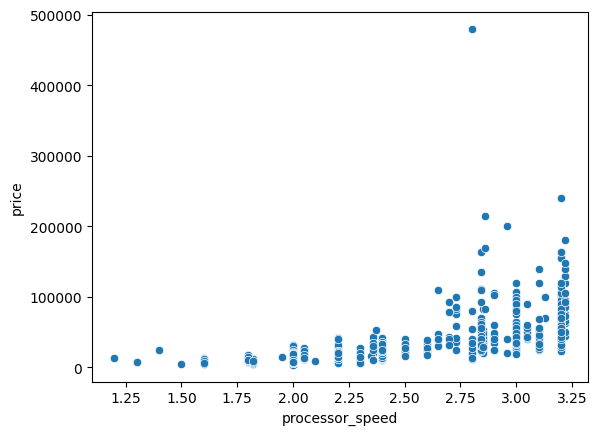

In [53]:
sns.scatterplot(data=temp_df,x='processor_speed',y='price')


Highly correlated with price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'snapdragon'),
  Text(1, 0, 'exynos'),
  Text(2, 0, 'dimensity'),
  Text(3, 0, 'bionic'),
  Text(4, 0, 'helio'),
  Text(5, 0, 'unisoc'),
  Text(6, 0, 'google'),
  Text(7, 0, 'tiger'),
  Text(8, 0, 'sc9863a'),
  Text(9, 0, 'fusion'),
  Text(10, 0, 'kirin'),
  Text(11, 0, 'spreadtrum'),
  Text(12, 0, 'mediatek')])

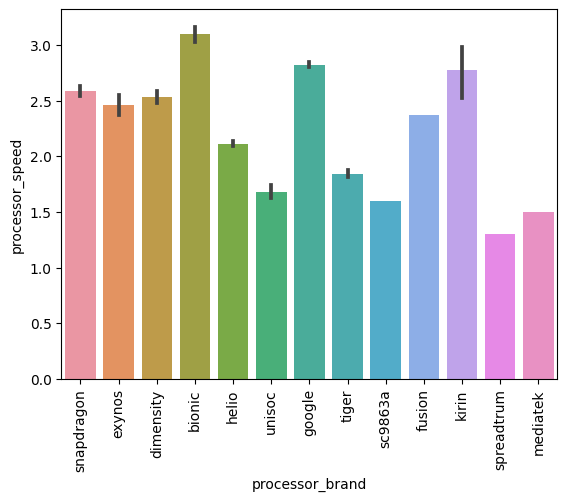

In [54]:
sns.barplot(data=temp_df,x='processor_brand',y='processor_speed')
plt.xticks(rotation='vertical')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'vivo'),
  Text(8, 0, 'poco'),
  Text(9, 0, 'iqoo'),
  Text(10, 0, 'tecno'),
  Text(11, 0, 'google'),
  Text(12, 0, 'infinix'),
  Text(13, 0, 'nokia'),
  Text(14, 0, 'honor'),
  Text(15, 0, 'huawei')])

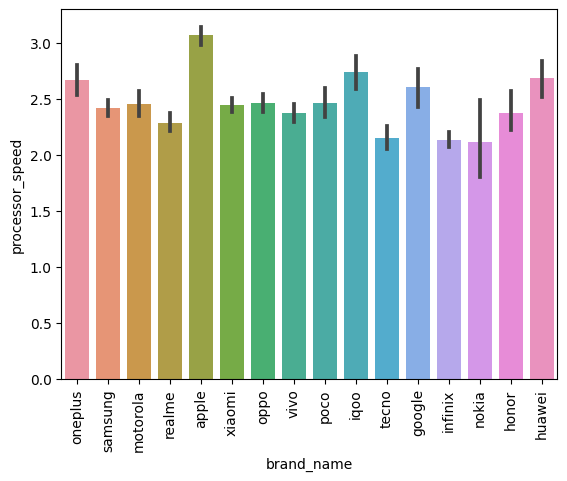

In [55]:
sns.barplot(data=temp_df,x='brand_name',y='processor_speed')
plt.xticks(rotation='vertical')


Highest processor speed for Apple and its processor Bionic followed by Google, Kirin, Snapdragon

7. Processor Brand v/s Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'snapdragon'),
  Text(1, 0, 'exynos'),
  Text(2, 0, 'dimensity'),
  Text(3, 0, 'bionic'),
  Text(4, 0, 'helio'),
  Text(5, 0, 'unisoc'),
  Text(6, 0, 'google'),
  Text(7, 0, 'tiger'),
  Text(8, 0, 'sc9863a'),
  Text(9, 0, 'fusion'),
  Text(10, 0, 'kirin'),
  Text(11, 0, 'spreadtrum'),
  Text(12, 0, 'mediatek')])

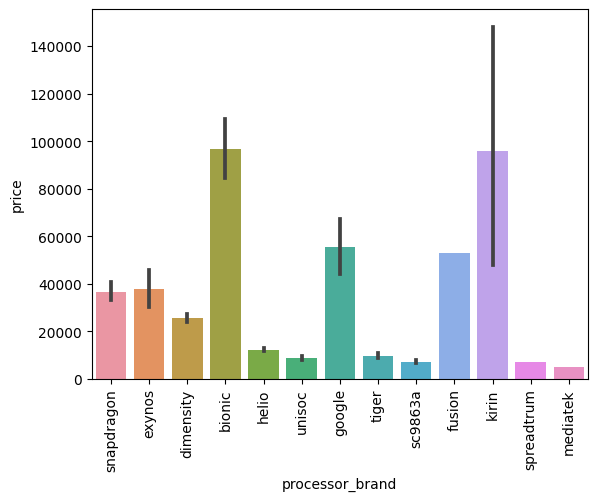

In [56]:
sns.barplot(data=temp_df,x='processor_brand',y='price')
plt.xticks(rotation='vertical')

8. Screen size v/s Price

0.21665881870544773

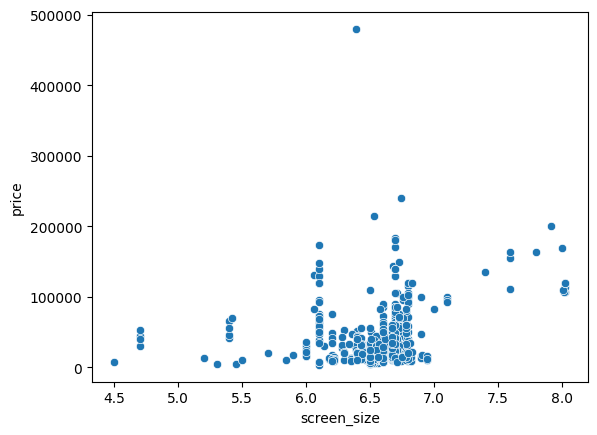

In [57]:
sns.scatterplot(data=temp_df,x='screen_size',y='price')
temp_df['price'].corr(temp_df['screen_size'])

9. Ram Capacity v/s Price

<Axes: xlabel='ram_capacity', ylabel='price'>

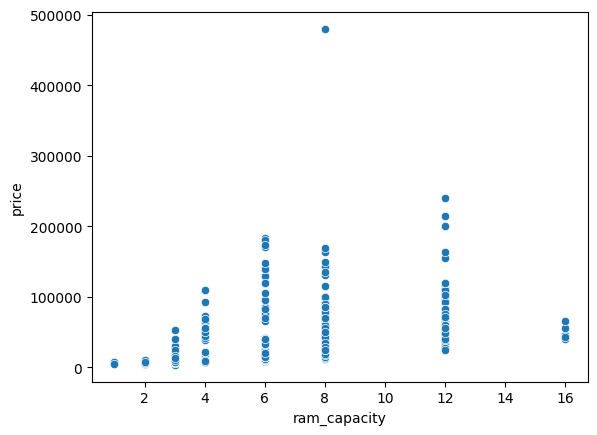

In [70]:
sns.scatterplot(data=temp_df,x='ram_capacity',y='price')

<Axes: xlabel='ram_capacity', ylabel='price'>

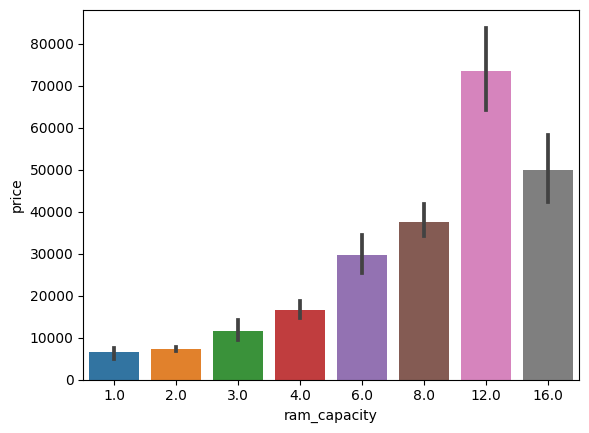

In [71]:
sns.barplot(data=temp_df,x='ram_capacity',y='price')

A strong linear correlation is clearly visible. A higher ram capacity does mean a higher price. Interesting to note a decrease in price for 16 GB ram phones.

In [72]:
pd.crosstab(temp_df['os'],temp_df['ram_capacity'])

ram_capacity,1.0,2.0,3.0,4.0,6.0,8.0,12.0,16.0
os,,,,,,,,
android,3,24,42,184,200,299,73,5
ios,0,0,3,16,23,4,0,0
other,0,0,0,1,1,7,1,0


On inspecting 12 GB ram capacity phones it is noted that they are highly featured. The reason for a dip in 16 GB phone prices might be because there are only 5 16 GB phones in the dataset.

10. Internal Memory v/s Price

<Axes: xlabel='internal_memory', ylabel='price'>

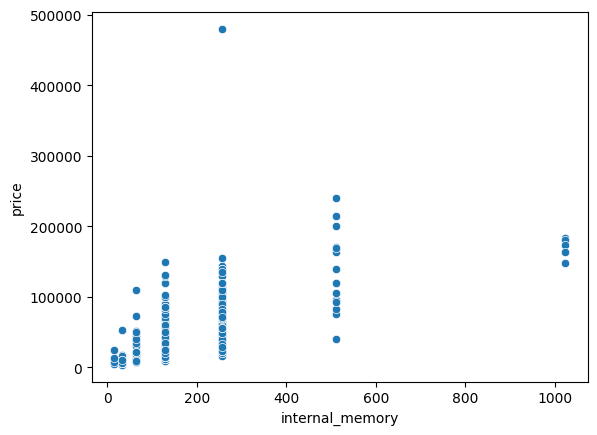

In [76]:
sns.scatterplot(data=temp_df,x='internal_memory',y='price')

<Axes: xlabel='internal_memory', ylabel='price'>

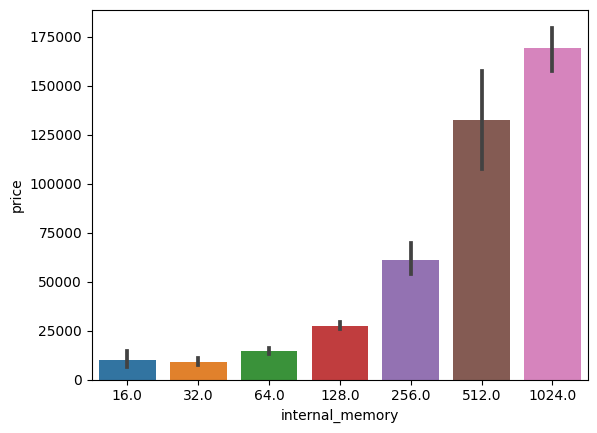

In [77]:
sns.barplot(data=temp_df,x='internal_memory',y='price')

Very strong linear correlation between the two features. More internal memory does imply a higher price.

11. Extended Memory Available v/s Price

<Axes: xlabel='extended_memory_available', ylabel='price'>

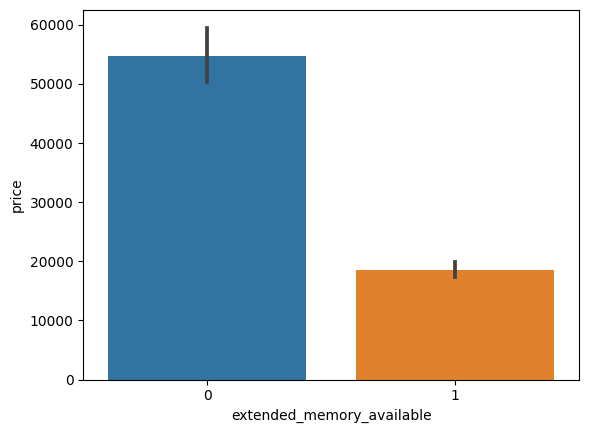

In [79]:
sns.barplot(data=temp_df,x='extended_memory_available',y='price')

In [81]:
temp_df[temp_df['price']<20000].groupby('extended_memory_available').count()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_upto
extended_memory_available,,,,,,,,,,,,,,,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25,25,25,23,25,25,25,25,25,25,25,25,25,25,0
1,435,435,435,417,435,435,435,427,435,427,435,435,331,435,435,435,435,435,435,435,435,435,435,367


In [90]:
temp_df[temp_df['price']>40000].groupby('extended_memory_available').count()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_upto
extended_memory_available,,,,,,,,,,,,,,,,,,,,,,,,
0,160,160,160,114,160,160,160,159,155,140,149,160,116,160,160,160,160,160,160,157,153,160,157,0
1,22,22,22,10,22,22,22,22,22,21,22,22,20,22,22,22,22,22,22,22,22,22,22,20


<Axes: xlabel='extended_memory_available', ylabel='internal_memory'>

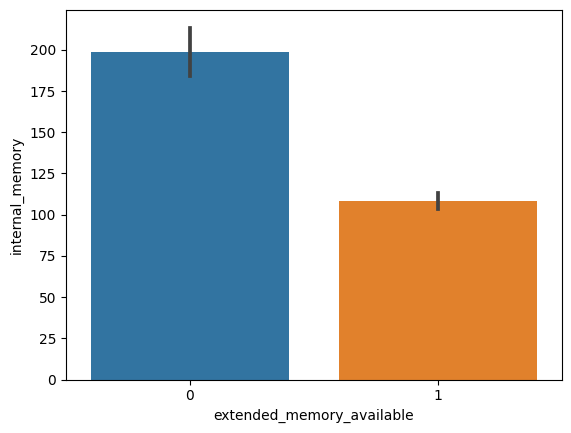

In [92]:
sns.barplot(temp_df,x='extended_memory_available',y='internal_memory')

1. Most cheaper phones below 20000 provide extended memory option
2. It is a rare feature in phones priced above 40000
3. Phones that do not provide extended memory generally has a higher internal memory.

12. Brand v/s Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'vivo'),
  Text(8, 0, 'poco'),
  Text(9, 0, 'iqoo'),
  Text(10, 0, 'tecno'),
  Text(11, 0, 'google'),
  Text(12, 0, 'infinix'),
  Text(13, 0, 'nokia'),
  Text(14, 0, 'honor'),
  Text(15, 0, 'huawei')])

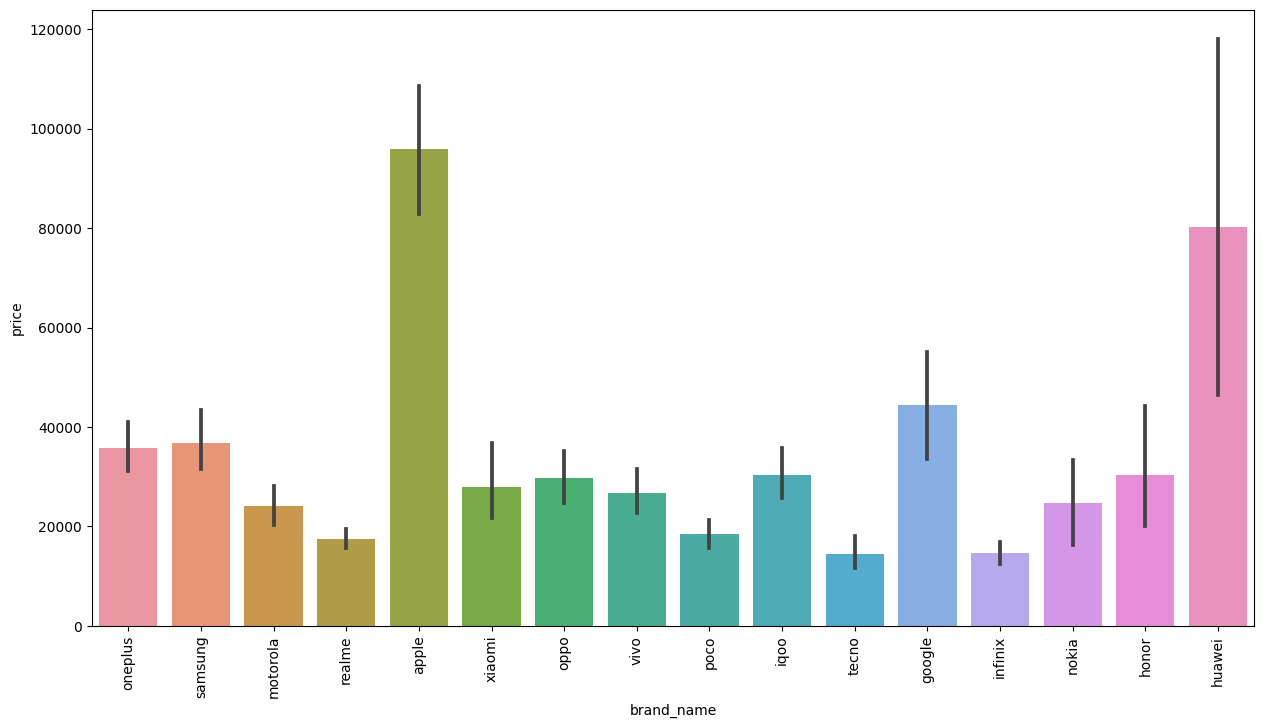

In [93]:
plt.figure(figsize=(15,8))
sns.barplot(data=temp_df,x='brand_name',y='price')
plt.xticks(rotation='vertical')

1. Apple provides the costliest phones
2. Followed by Huawei which provides phones at a wide range as inferred from the long confidence interval
3. Google, Samsung, One Plus follow

13. Processor Brand v/s Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'snapdragon'),
  Text(1, 0, 'exynos'),
  Text(2, 0, 'dimensity'),
  Text(3, 0, 'bionic'),
  Text(4, 0, 'helio'),
  Text(5, 0, 'unisoc'),
  Text(6, 0, 'google'),
  Text(7, 0, 'tiger'),
  Text(8, 0, 'sc9863a'),
  Text(9, 0, 'fusion'),
  Text(10, 0, 'kirin'),
  Text(11, 0, 'spreadtrum'),
  Text(12, 0, 'mediatek')])

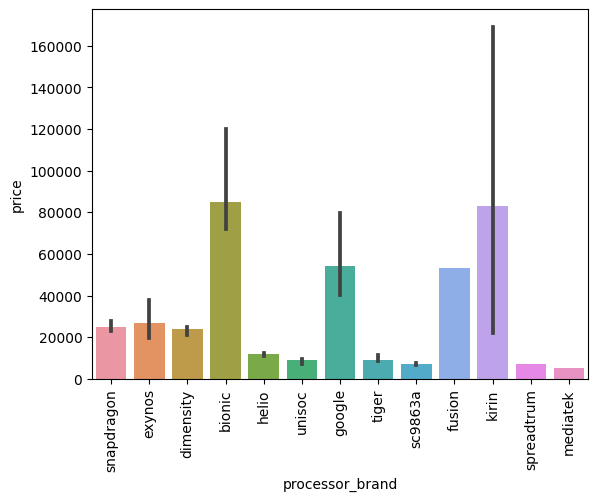

In [94]:
sns.barplot(data=temp_df,x='processor_brand',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

Bionic by Apple and Kirin by Huawei and Honor have the costliest phones

In [60]:
df.corr()['rating']


<ipython-input-60-65b2b949a876>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['rating']


price                        0.283504
rating                       1.000000
has_5g                       0.596087
has_nfc                      0.474754
has_ir_blaster               0.156421
num_cores                    0.199741
processor_speed              0.628446
battery_capacity            -0.015581
fast_charging_available      0.542814
fast_charging                0.527613
ram_capacity                 0.757613
internal_memory              0.481070
screen_size                  0.298272
refresh_rate                 0.610795
num_rear_cameras             0.515531
num_front_cameras            0.131480
primary_camera_rear          0.562046
primary_camera_front         0.577861
extended_memory_available   -0.415265
extended_upto                0.346761
Name: rating, dtype: float64

Applying KNN Imputer to tackle missing values

In [61]:
from sklearn.impute import KNNImputer
x_df = df.select_dtypes(include=['int64','float64']).drop(columns='price')

In [62]:
imputer = KNNImputer(n_neighbors=5)


In [63]:
x_df_values = imputer.fit_transform(x_df)


In [64]:
x_df = pd.DataFrame(x_df_values,columns=x_df.columns)


In [65]:
x_df['price'] = df['price']


In [66]:
x_df.head()


,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,price
0,89.0,8.0,3.2,5000.0,1.0,100.0,12.0,256.0,6.70,120.0,3.0,1.0,50.0,16.0,0.0,870.4,54999
1,81.0,8.0,2.2,5000.0,1.0,33.0,6.0,128.0,6.59,120.0,3.0,1.0,64.0,16.0,1.0,1024.0,19989
2,75.0,8.0,2.4,5000.0,1.0,15.0,4.0,64.0,6.60,90.0,3.0,1.0,50.0,13.0,1.0,1024.0,16499
3,81.0,8.0,2.2,5000.0,1.0,29.2,6.0,128.0,6.55,120.0,3.0,1.0,50.0,16.0,1.0,1024.0,14999
4,82.0,8.0,2.6,5000.0,1.0,67.0,6.0,128.0,6.70,120.0,3.0,1.0,108.0,16.0,0.0,1024.0,24999


In [67]:
a = x_df.corr()['price'].reset_index()


In [68]:
b = df.corr()['price'].reset_index()


<ipython-input-68-dcd5fd260837>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  b = df.corr()['price'].reset_index()


In [69]:
b.merge(a,on='index')

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.283504,0.341727
2,num_cores,-0.048561,-0.055949
3,processor_speed,0.474049,0.488426
4,battery_capacity,-0.159232,-0.166257
5,fast_charging_available,0.116739,0.116739
6,fast_charging,0.277591,0.220688
7,ram_capacity,0.386002,0.386002
8,internal_memory,0.557168,0.557168
9,screen_size,0.113253,0.113253
